<a href="https://colab.research.google.com/github/pratikjade/AI_Content_Detector_GUI/blob/main/notebook/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv ('/content/drive/MyDrive/finalproject/chatgpt_paraphrases.csv')
print(df)
print(df.shape)

                                                     text  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
419192  He wants to see prices brought down across the...   
419193  Costs: The Department for Environment, Food an...   
419194  Details of the action on water bills are expec...   
419195  Chancellor George Osborne signalled the govern...   
419196  But Mr Miliband appeared to steal a march on t...   

                                              paraphrases  category    source  
0       ['Can you provide a detailed procedure for inv...  question     quora  
1       ['Can you tell me about the history of the Koh...  question     quora  
2       ['What are some way

In [ ]:
df.head(10)

,text,paraphrases,category,source
0,What is the step by step guide to invest in sh...,['Can you provide a detailed procedure for inv...,question,quora
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,['Can you tell me about the history of the Koh...,question,quora
2,How can I increase the speed of my internet co...,['What are some ways to enhance my internet sp...,question,quora
3,Why am I mentally very lonely? How can I solve...,['What is causing my mental loneliness and how...,question,quora
4,"Which one dissolve in water quikly sugar, salt...","['Among sugar, salt, methane, and carbon dioxi...",question,quora
5,Astrology: I am a Capricorn Sun Cap moon and c...,['What can be inferred about me based on my Ca...,question,quora
6,Should I buy tiago?,"['Is purchasing a Tiago a good idea?', 'Would ...",question,quora
7,How can I be a good geologist?,['What steps can I take to become a skilled ge...,question,quora
8,When do you use シ instead of し?,"['In what situations is シ used instead of し?',...",question,quora
9,Motorola (company): Can I hack my Charter Moto...,['Is it possible to hack my Charter Motorola D...,question,quora


In [ ]:
df['text'][1]
df['paraphrases'][1]

"['Can you tell me about the history of the Kohinoor (Koh-i-Noor) Diamond?', 'What is the tale behind the Kohinoor (Koh-i-Noor) Diamond?', 'Could you narrate the story of the Kohinoor (Koh-i-Noor) Diamond?', 'What is the account of the Kohinoor (Koh-i-Noor) Diamond?', 'Can you describe the legend of the Kohinoor (Koh-i-Noor) Diamond?']"

In [ ]:
category={}
for i in range(len(df)):
    chatgpt=df.iloc[i]["paraphrases"][1:-1].split(', ')
    for j in chatgpt[:1]:
        category[j[1:-1]]='chatgpt'
    category[df.iloc[i]['text']]="human"

category

{'Can you provide a detailed procedure for investing in the Indian stock market?': 'chatgpt',
 'What is the step by step guide to invest in share market in india?': 'human',
 'Can you tell me about the history of the Kohinoor (Koh-i-Noor) Diamond?': 'chatgpt',
 'What is the story of Kohinoor (Koh-i-Noor) Diamond?': 'human',
 'What are some ways to enhance my internet speed when utilizing a VPN?': 'chatgpt',
 'How can I increase the speed of my internet connection while using a VPN?': 'human',
 'What is causing my mental loneliness and how can I overcome it?': 'chatgpt',
 'Why am I mentally very lonely? How can I solve it?': 'human',
 'Among suga': 'chatgpt',
 'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?': 'human',
 'What can be inferred about me based on my Capricorn Su': 'chatgpt',
 'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?': 'human',
 'Is purchasing a Tiago a good idea?': 'chatgpt',
 'Should I buy tiago?':

In [ ]:
df=pd.DataFrame(category.items(),columns=["text","category"])
df=df.sample(frac=1)
df=df[:50000]
df

,text,category
744330,Amanda Marcu,chatgpt
502236,"Boston has been proposed as the new ""TitleTow",chatgpt
143028,What is the furthest point in history that a f...,chatgpt
48420,Why is the role of governance in economic growth?,human
287164,Would a compact humidifier placed near the bed...,chatgpt
...,...,...
115365,How would an elderly man's bedroom be decorate...,chatgpt
505413,The British had suffered further defeats in No...,human
634483,The second major event of the early reign of A...,human
518888,The team was eliminated in the first round of ...,chatgpt


In [ ]:
df=df.reset_index()

In [ ]:
df.head(10)

,index,text,category
0,744330,Amanda Marcu,chatgpt
1,502236,"Boston has been proposed as the new ""TitleTow",chatgpt
2,143028,What is the furthest point in history that a f...,chatgpt
3,48420,Why is the role of governance in economic growth?,human
4,287164,Would a compact humidifier placed near the bed...,chatgpt
5,243769,Had Stonewall Jackson survived Chancellorsvill...,chatgpt
6,386701,Which tailor in India is considered the finest?,chatgpt
7,30175,How do you think the relationship between Chin...,human
8,216785,What are the online tools to learn logic thr...,human
9,361463,How can I learn the ability to sing?,human


In [ ]:
df = df.drop(['index'], axis=1)

In [ ]:
df.head(10)

,text,category
0,Amanda Marcu,chatgpt
1,"Boston has been proposed as the new ""TitleTow",chatgpt
2,What is the furthest point in history that a f...,chatgpt
3,Why is the role of governance in economic growth?,human
4,Would a compact humidifier placed near the bed...,chatgpt
5,Had Stonewall Jackson survived Chancellorsvill...,chatgpt
6,Which tailor in India is considered the finest?,chatgpt
7,How do you think the relationship between Chin...,human
8,What are the online tools to learn logic thr...,human
9,How can I learn the ability to sing?,human


In [ ]:
df.shape[0]

50000

In [ ]:
df["category"].value_counts()

human      25802
chatgpt    24198
Name: category, dtype: int64

In [ ]:
X=df['text']
y=df['category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
lr = LogisticRegression(penalty='l1',solver='liblinear')
svm = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
def prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    f1= metrics.f1_score(y_test,pr,average="binary", pos_label="chatgpt")
    return acc_score,f1

acc_score = {}
f1_score={}
clfs= {
    'MNB':mnb,
    'LR':lr,
    'SVM':svm,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,
}
for name,clf in clfs.items():
    acc_score[name],f1_score[name]= prediction(clf,X_train_tfidf,X_test_tfidf,y_train,y_test)


In [ ]:
for name, acc in acc_score.items():
    print(f'Accuracy for {name}: {acc}')

for name, f1 in f1_score.items():
    print(f'F1 score for {name}: {f1}')

Accuracy for MNB: 0.7549
Accuracy for LR: 0.7811
Accuracy for SVM: 0.7862
Accuracy for DTC: 0.6409
Accuracy for KNN: 0.6599
Accuracy for RFC: 0.7804
Accuracy for ETC: 0.794
Accuracy for ABC: 0.718
Accuracy for BG: 0.7474
Accuracy for GBC: 0.7103
F1 score for MNB: 0.7181138585393905
F1 score for LR: 0.7738402727554499
F1 score for SVM: 0.7750420875420876
F1 score for DTC: 0.678600196903249
F1 score for KNN: 0.5850921068683664
F1 score for RFC: 0.7801801801801801
F1 score for ETC: 0.7873219079083214
F1 score for ABC: 0.724609375
F1 score for BG: 0.7455680902497985
F1 score for GBC: 0.7213083213083213


In [ ]:
etc.fit(X_train_tfidf,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

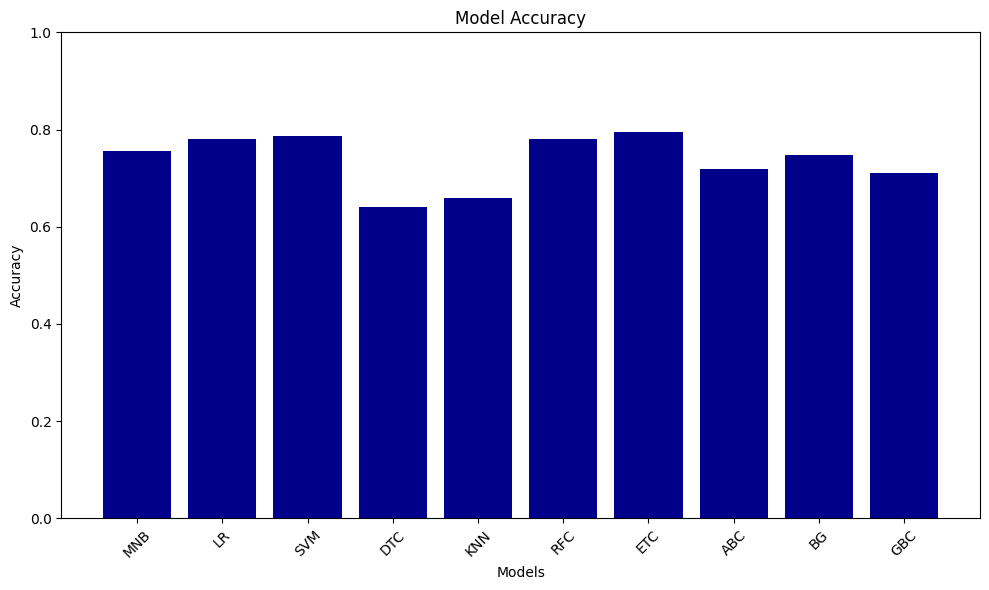

In [ ]:
import matplotlib.pyplot as plt
models = list(acc_score.keys())
accuracy_scores = [acc_score[model] for model in models]

#bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='darkblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


[[3813 1001]
 [1059 4127]]


<Axes: >

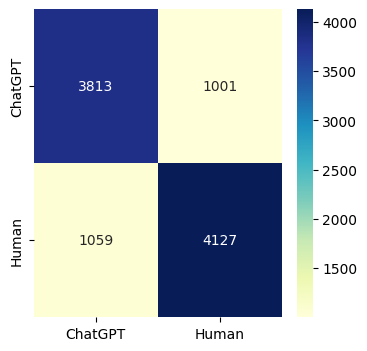

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred =etc.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print(cm)
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (4,4))
sn.heatmap(confusion_matrix, annot=True,cmap="YlGnBu", fmt='g')

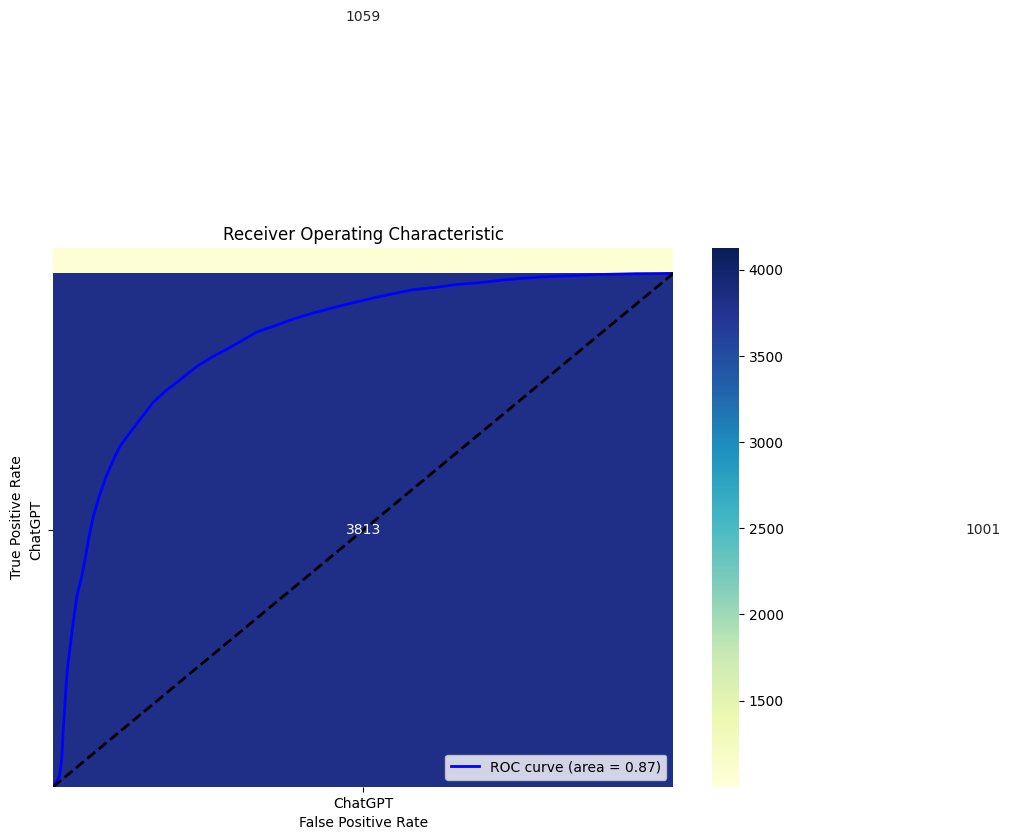

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt='g')

# roc curve

from sklearn.metrics import roc_curve,auc
y_prob = etc.predict_proba(X_test_tfidf)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='human')

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_preddf=pd.DataFrame(y_pred)
y_preddf.rename(columns={0:'category predicted'},inplace=True)
y_preddf

,category predicted
0,human
1,human
2,chatgpt
3,chatgpt
4,human
...,...
9995,chatgpt
9996,human
9997,chatgpt
9998,human


In [ ]:
x_testdf=pd.DataFrame(X_test)
y_testdf=pd.DataFrame(y_test)
x_testdf['id'] = range(1, len(x_testdf) + 1)
y_testdf['id'] = range(1, len(y_testdf) + 1)
y_preddf['id'] = range(1, len(y_preddf) + 1)
join1=y_testdf.merge(x_testdf, how = 'inner' ,indicator=False)
join_df=join1.merge(y_preddf, how = 'inner' ,indicator=False)
join_df[20:30]

,category,id,text,category predicted
20,chatgpt,21,What is the opinion of Pakistanis regarding In...,chatgpt
21,human,22,The head master of one of the most exclusive s...,chatgpt
22,chatgpt,23,What is the method used to calculate the squar...,chatgpt
23,chatgpt,24,Hovertravel offers the quickest means of cross...,chatgpt
24,chatgpt,25,He recently underwent surgery and had a wound ...,chatgpt
25,human,26,What exactly does love mean to you?,human
26,human,27,What is the best workout method?,human
27,human,28,How can I sell my products on Flipkart?,human
28,human,29,What is the weirdest thing you've found when G...,human
29,chatgpt,30,What are the objectives for students who are b...,chatgpt


In [ ]:
accuracy_score=metrics.accuracy_score(y_pred,y_test)*100
accuracy_score


79.4

In [ ]:
input=['Hello!! This is Pratik']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

array(['chatgpt'], dtype=object)

In [ ]:
input=['Hello!! This is chatgpt']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

array(['chatgpt'], dtype=object)

In [ ]:
input=['India calls off ban on imports of laptops, tablets and other other IT hardware']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)


array(['human'], dtype=object)

In [ ]:
input=['The rapid progress of artificial intelligence has given rise to an increasing necessity for tools that can accurately discern the origin of content.']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

array(['chatgpt'], dtype=object)

In [ ]:
input=['SHAP is a framework for explaining machine learning models. It has been implemented in various programming languages, including Python.']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

array(['human'], dtype=object)

In [ ]:
input=['Why do so many American politicians from both parties care 100 times more about the Ukraine border than the USA border?']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

array(['human'], dtype=object)

In [ ]:
input=['An AI ethical stakeholder is an individual, group, organization, or entity that has a vested interest in ensuring that artificial intelligence (AI) technologies are developed, deployed, and used in a manner that aligns with ethical principles, societal values, and the greater good. These stakeholders actively participate in discussions, decisions, and actions related to the ethical aspects of AI, aiming to influence and promote responsible AI practices.']
vect_input=vectorizer.transform(input)
etc.predict(vect_input)

array(['human'], dtype=object)

In [ ]:
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))